In [ ]:
from google.colab import files
uploaded = files.upload()

Saving radarsimpy.zip to radarsimpy.zip


In [ ]:
import zipfile
import os

#os.rename("Ubuntu22_x86_64_CPU.zip", "radarsimpy.zip")
# Replace 'radarsimpy.zip' with the name of the uploaded file
with zipfile.ZipFile("radarsimpy.zip", "r") as zip_ref:
    zip_ref.extractall("radarsimpy")

In [ ]:
%cd radarsimpy
#os.rename("Linux_x86_64_CPU", "radarsimpy")

/content/radarsimpy


In [ ]:
import sys
sys.path.append('/content/radarsimpy/radarsimpy')

In [ ]:
import radarsimpy

In [ ]:
!pip3 install pymeshlab
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.0/98.0 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00


Soccer Ball

In [ ]:
import pymeshlab
import numpy as np

target = {
    "model": "/content/radarsimpy/radarsimpy/models/soccer ball.stl",
    "unit": "m",
    "location": (0, 0, 0),
}

In [ ]:
import plotly.graph_objs as go
from IPython.display import Image

ms = pymeshlab.MeshSet()
ms.load_new_mesh(target["model"])
t_mesh = ms.current_mesh()
v_matrix = np.array(t_mesh.vertex_matrix())
f_matrix = np.array(t_mesh.face_matrix())

fig = go.Figure()
fig.add_trace(
    go.Mesh3d(
        x=v_matrix[:, 0],
        y=v_matrix[:, 1],
        z=v_matrix[:, 2],
        i=f_matrix[:, 0],
        j=f_matrix[:, 1],
        k=f_matrix[:, 2],
        intensity=v_matrix[:, 2],
        colorscale="Viridis",
    )
)
fig["layout"]["scene"]["aspectmode"] = "data"
fig["layout"]["height"] = 600

# uncomment this to display interactive plot
fig.show()

# display static image to reduce size on radarsimx.com
#img_bytes = fig.to_image(format="jpg", scale=2)
#display(Image(img_bytes))

In [ ]:
import time

from radarsimpy.rt import rcs_sbr

phi = np.arange(0, 360, 1)
theta = 90
freq = 76e9
pol = [0, 0, 1]
density = 0.1

rcs = np.zeros_like(phi)

tic = time.time()
for phi_idx, phi_ang in enumerate(phi):
    rcs[phi_idx] = 10 * np.log10(
        rcs_sbr([target], freq, phi_ang, theta, pol, density=density)
    )
toc = time.time()

print("Exec time :" + str(toc - tic) + "s")

Exec time :198.12924027442932s


Simulate RCS vs Observation Angle

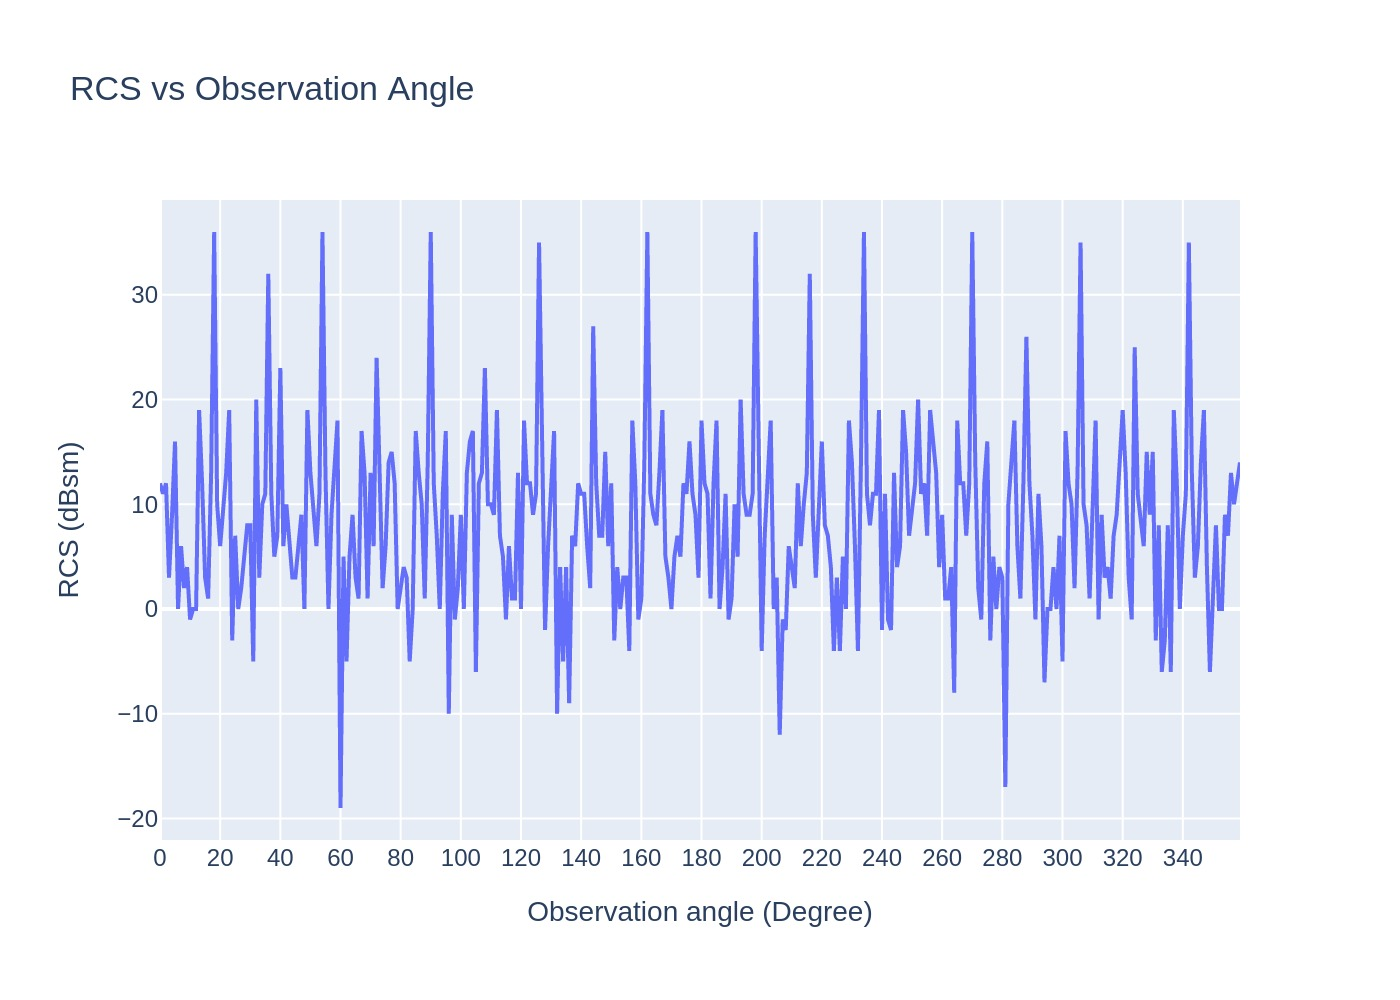

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=phi, y=rcs))

fig.update_layout(
    title="RCS vs Observation Angle",
    yaxis=dict(title="RCS (dBsm)"),
    xaxis=dict(title="Observation angle (Degree)", dtick=20),
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))

Goal keeper gloves

In [ ]:
import pymeshlab
import numpy as np

target = {
    "model": "/content/radarsimpy/radarsimpy/models/Glove Dummy.stl",
    "unit": "m",
    "location": (0, 0, 0),
}

In [ ]:
import plotly.graph_objs as go
from IPython.display import Image

ms = pymeshlab.MeshSet()
ms.load_new_mesh(target["model"])
t_mesh = ms.current_mesh()
v_matrix = np.array(t_mesh.vertex_matrix())
f_matrix = np.array(t_mesh.face_matrix())

fig = go.Figure()
fig.add_trace(
    go.Mesh3d(
        x=v_matrix[:, 0],
        y=v_matrix[:, 1],
        z=v_matrix[:, 2],
        i=f_matrix[:, 0],
        j=f_matrix[:, 1],
        k=f_matrix[:, 2],
        intensity=v_matrix[:, 2],
        colorscale="Viridis",
    )
)
fig["layout"]["scene"]["aspectmode"] = "data"
fig["layout"]["height"] = 600

# uncomment this to display interactive plot
fig.show()

# display static image to reduce size on radarsimx.com
#img_bytes = fig.to_image(format="jpg", scale=2)
#display(Image(img_bytes))

In [ ]:
import time

from radarsimpy.rt import rcs_sbr

phi = np.arange(0, 360, 1)
theta = 90
freq = 76e9
pol = [0, 0, 1]
density = 0.1

rcs = np.zeros_like(phi)

tic = time.time()
for phi_idx, phi_ang in enumerate(phi):
    rcs[phi_idx] = 10 * np.log10(
        rcs_sbr([target], freq, phi_ang, theta, pol, density=density)
    )
toc = time.time()

print("Exec time :" + str(toc - tic) + "s")

Exec time :121.42143297195435s


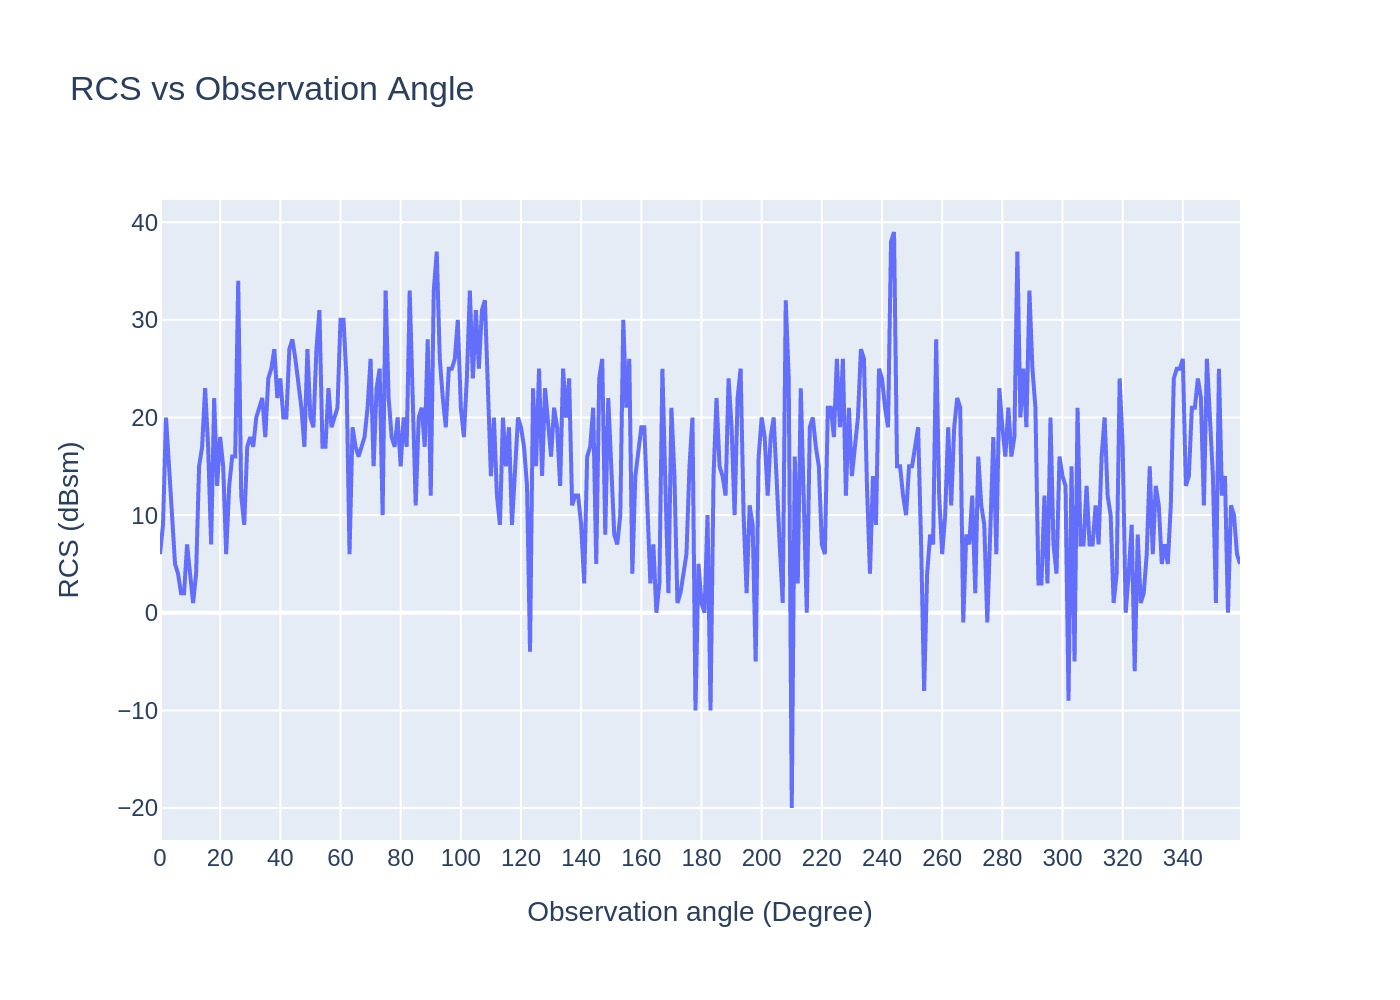

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=phi, y=rcs))

fig.update_layout(
    title="RCS vs Observation Angle",
    yaxis=dict(title="RCS (dBsm)"),
    xaxis=dict(title="Observation angle (Degree)", dtick=20),
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))

In [ ]:
import time
from radarsimpy.rt import rcs_sbr

phi = np.arange(-90, 90, 0.5)
theta = 90
freq = 1e9
pol = [0, 0, 1]
density = 4

rcs_ball = np.zeros_like(phi)
rcs_gloves = np.zeros_like(phi)

target_ball = {
    "model": "/content/radarsimpy/radarsimpy/models/soccer ball.stl",
    "unit": "m",
    "location": (0, 0, 0),
}

target_gloves = {
    "model": "/content/radarsimpy/radarsimpy/models/Glove Dummy.stl",
    "unit": "m",
    "location": (0, 0, 0),
}

tic = time.time()
for phi_idx, phi_ang in enumerate(phi):
    rcs_ball[phi_idx] = 10 * np.log10(
        rcs_sbr([target_ball], freq, phi_ang, theta, pol, density=density) + 0.000001
    )

    rcs_gloves[phi_idx] = 10 * np.log10(
        rcs_sbr([target_gloves], freq, phi_ang, theta, pol, density=density) + 0.000001
    )

toc = time.time()

print("Exec time :" + str(toc - tic) + "s")

Exec time :130.3169825077057s


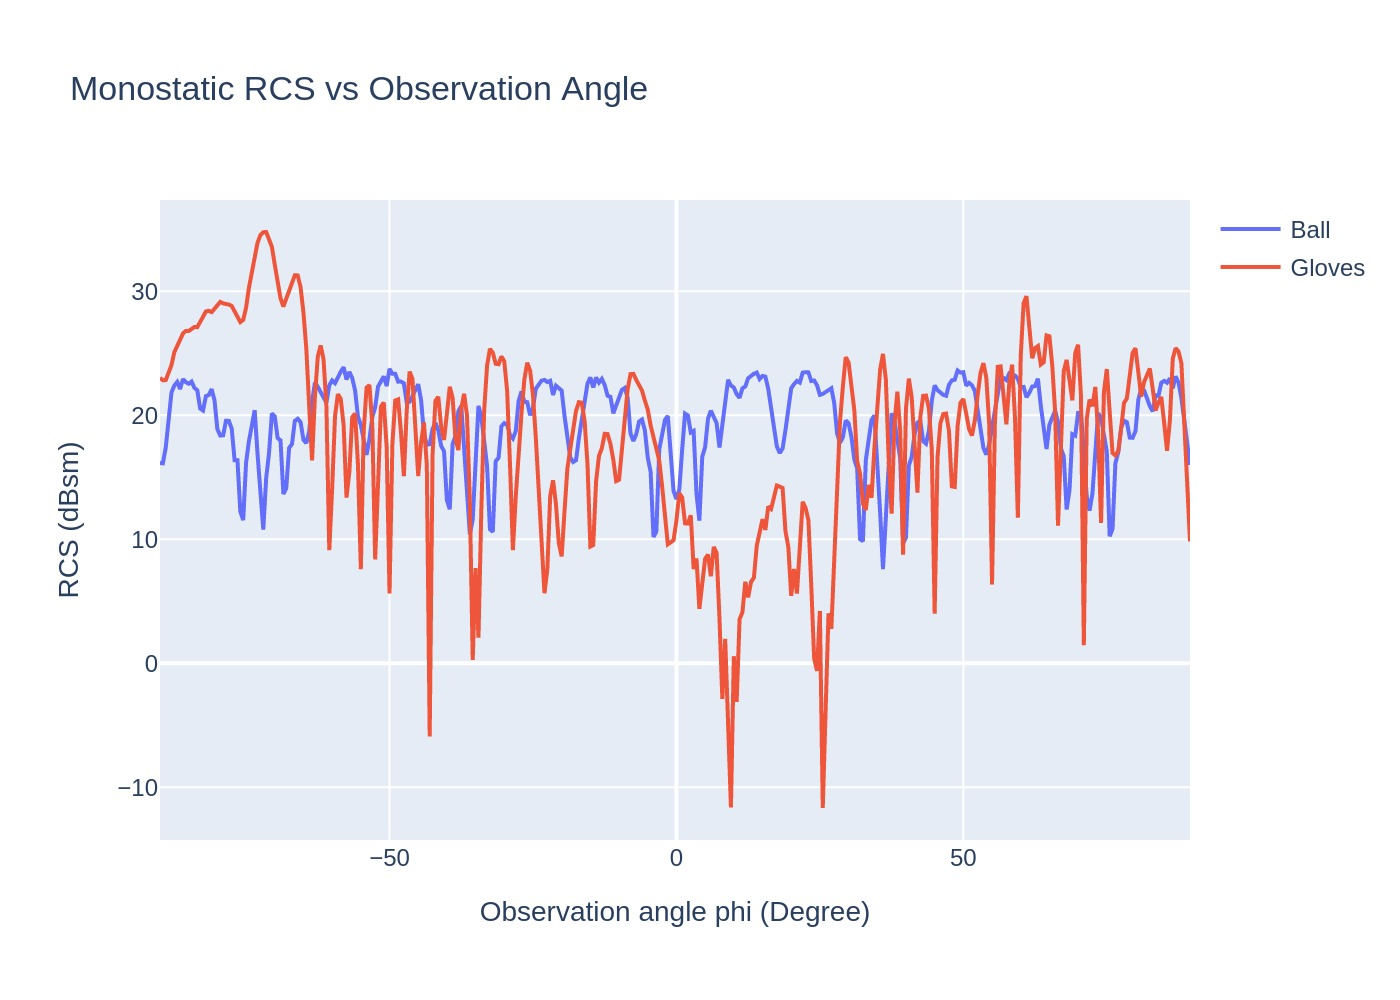

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=phi, y=rcs_ball, name="Ball"))
fig.add_trace(go.Scatter(x=phi, y=rcs_gloves, name="Gloves"))
fig.update_layout(
    title="Monostatic RCS vs Observation Angle",
    yaxis=dict(title="RCS (dBsm)"),
    xaxis=dict(title="Observation angle phi (Degree)"),
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))

In [ ]:
obs_phi = np.arange(-90, 90, 0.5)
obs_theta = 90
freq = 1e9
pol = [0, 1, 0]
density = 1

rcs_vpol_ball = np.zeros_like(obs_phi)
rcs_hpol_ball = np.zeros_like(obs_phi)

rcs_vpol_gloves = np.zeros_like(obs_phi)
rcs_hpol_gloves = np.zeros_like(obs_phi)

inc_phi = 45
inc_theta = 90

target_ball = {
    "model": "/content/radarsimpy/radarsimpy/models/soccer ball.stl",
    "unit": "m",
    "location": (0, 0, 0),
}

target_gloves = {
    "model": "/content/radarsimpy/radarsimpy/models/Glove Dummy.stl",
    "unit": "m",
    "location": (0, 0, 0),
}

tic = time.time()
for phi_idx, phi_ang in enumerate(obs_phi):
    rcs_vpol_ball[phi_idx] = 10 * np.log10(
        rcs_sbr(
            [target_ball],
            freq,
            inc_phi=inc_phi,
            inc_theta=inc_theta,
            inc_pol=[0, 0, 1],
            obs_phi=phi_ang,
            obs_theta=obs_theta,
            density=density,
        )
        + 0.0000001
    )
    rcs_hpol_ball[phi_idx] = 10 * np.log10(
        rcs_sbr(
            [target_ball],
            freq,
            inc_phi=inc_phi,
            inc_theta=inc_theta,
            inc_pol=[0, 1, 0],
            obs_phi=phi_ang,
            obs_theta=obs_theta,
            density=density,
        )
        + 0.0000001
    )
    rcs_vpol_gloves[phi_idx] = 10 * np.log10(
        rcs_sbr(
            [target_gloves],
            freq,
            inc_phi=inc_phi,
            inc_theta=inc_theta,
            inc_pol=[0, 0, 1],
            obs_phi=phi_ang,
            obs_theta=obs_theta,
            density=density,
        )
        + 0.0000001
    )
    rcs_hpol_gloves[phi_idx] = 10 * np.log10(
        rcs_sbr(
            [target_gloves],
            freq,
            inc_phi=inc_phi,
            inc_theta=inc_theta,
            inc_pol=[0, 1, 0],
            obs_phi=phi_ang,
            obs_theta=obs_theta,
            density=density,
        )
        + 0.0000001
    )
toc = time.time()
print("Exec time :" + str(toc - tic) + "s")

Exec time :95.14114022254944s


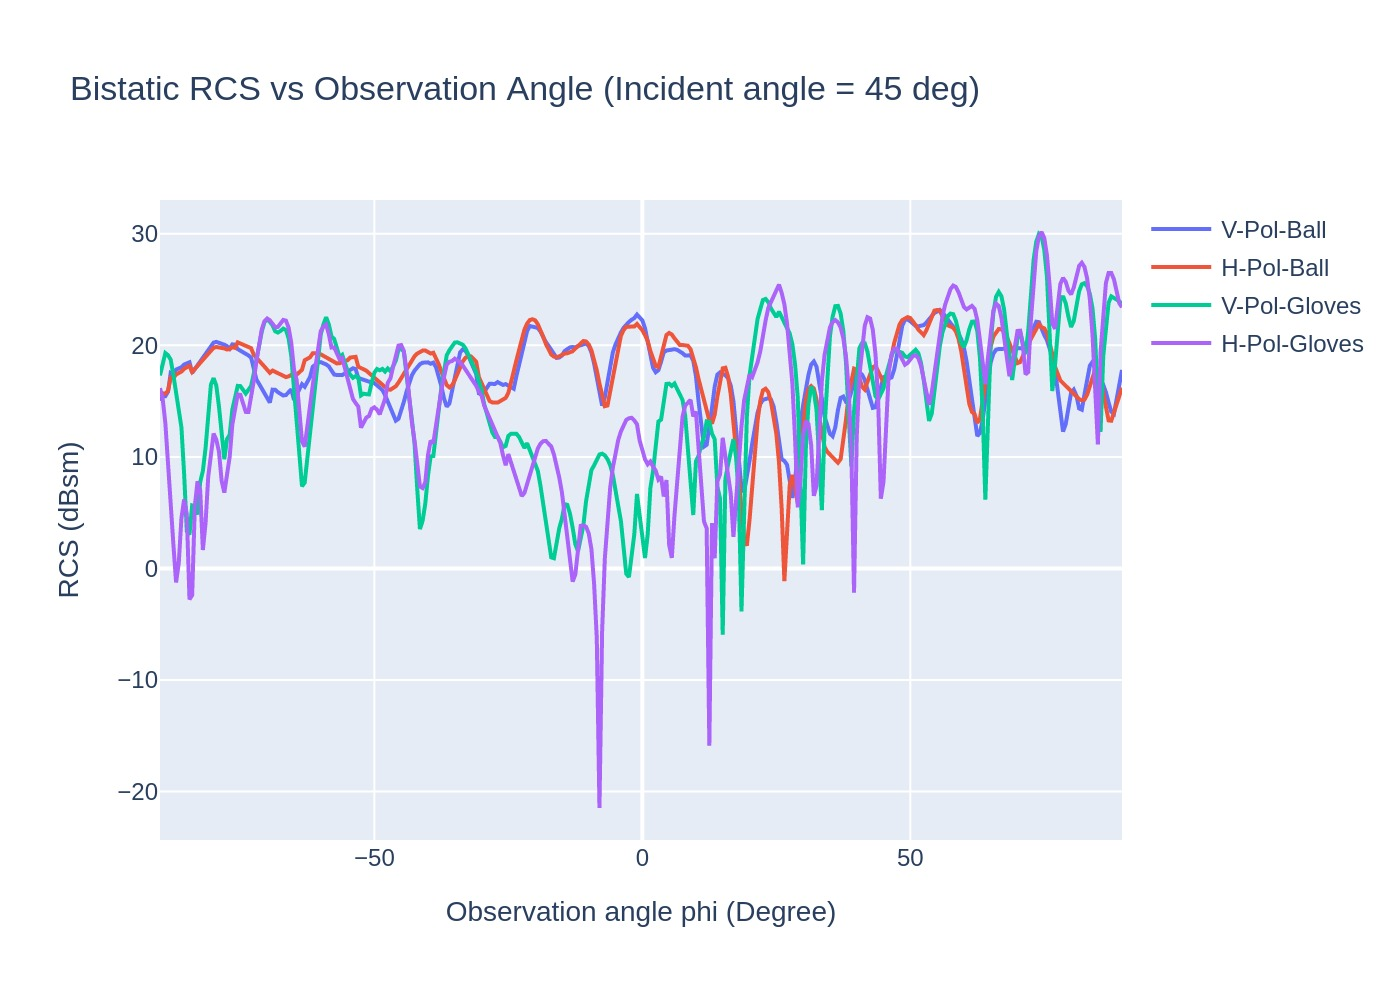

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=obs_phi, y=rcs_vpol_ball, name="V-Pol-Ball"))
fig.add_trace(go.Scatter(x=obs_phi, y=rcs_hpol_ball, name="H-Pol-Ball"))

fig.add_trace(go.Scatter(x=obs_phi, y=rcs_vpol_gloves, name="V-Pol-Gloves"))
fig.add_trace(go.Scatter(x=obs_phi, y=rcs_hpol_gloves, name="H-Pol-Gloves"))

fig.update_layout(
    title="Bistatic RCS vs Observation Angle (Incident angle = 45 deg)",
    yaxis=dict(title="RCS (dBsm)"),
    xaxis=dict(title="Observation angle phi (Degree)"),
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))